# Trabalho Prático - Introdução à Ciência dos Dados - 2019/1

* Jéssica Taís Carvalho Rodrigues
* Martinelle Araujo dos Santos

# Introdução - Motivação

Ao se pensar na educação no Brasil, um país marcado pela desigualdade. Algumas pessoas podem imaginar que em municípios maiores, por muitas vezes terem acesso a mais recursos, o desempenho dos alunos na rede pública atinge níveis mais satisfatórios do que em municípios menores.

Porém, o que os **dados dizem** sobre isso?

# Questão inicial

Nos municípios de **Minas Gerais**, o desempenho nos **anos iniciais da educação básica** é  o mesmo para **municípios pequenos e grande**?


In [25]:
# -*- coding: utf 8

from matplotlib import pyplot as plt
from scipy import stats as ss
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp as ks
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [26]:
df = pd.read_csv('EduBas_Munic.csv')

# Transformando Sim em 1 e Não em 0
df['Barco'] = df['Barco'].map({'Sim': 1, 'Não': 0})
df['Metro'] = df['Metro'].map({'Sim': 1, 'Não': 0})
df['Mototx'] = df['Mototx'].map({'Sim': 1, 'Não': 0})
df['Taxi'] = df['Taxi'].map({'Sim': 1, 'Não': 0})
df['Trem'] = df['Trem'].map({'Sim': 1, 'Não': 0})
df['Van'] = df['Van'].map({'Sim': 1, 'Não': 0})
df['Aviao'] = df['Aviao'].map({'Sim': 1, 'Não': 0})
df['ImpacAmb_24meses'] = df['ImpacAmb_24meses'].map({'Sim': 1, 'Não': 0})
df['Secas_Enxurr'] = df['Secas_Enxurr'].map({'Sim': 1, 'Não': 0})
df['PoluiAr'] = df['PoluiAr'].map({'Sim': 1, 'Não': 0})
df['Polui_corpoAgua'] = df['Polui_corpoAgua'].map({'Sim': 1, 'Não': 0})
df['Assorea_corpoAgua'] = df['Assorea_corpoAgua'].map({'Sim': 1, 'Não': 0})
df['DiminVazao_corpoAgua'] = df['DiminVazao_corpoAgua'].map({'Sim': 1, 'Não': 0})
df['Desmatam'] = df['Desmatam'].map({'Sim': 1, 'Não': 0})
df['Queimad'] = df['Queimad'].map({'Sim': 1, 'Não': 0})
df['Erosao_Desert'] = df['Erosao_Desert'].map({'Sim': 1, 'Não': 0})
df['Dimin_FaunaFlora'] = df['Dimin_FaunaFlora'].map({'Sim': 1, 'Não': 0})
df['MoradRiscoAmb'] = df['MoradRiscoAmb'].map({'Sim': 1, 'Não': 0})
df['FaltaSaneamen'] = df['FaltaSaneamen'].map({'Sim': 1, 'Não': 0})
df['Favela'] = df['Favela'].map({'Sim': 1, 'Não': 0})
df['Cortico'] = df['Cortico'].map({'Sim': 1, 'Não': 0})
df['LoteIrr'] = df['LoteIrr'].map({'Sim': 1, 'Não': 0})
df['Ocupacao'] = df['Ocupacao'].map({'Sim': 1, 'Não': 0})
df['AtingidoPorSeca_4a'] = df['AtingidoPorSeca_4a'].map({'Sim': 1, 'Não': 0})
df['AtingPorAlagam_4a'] = df['AtingPorAlagam_4a'].map({'Sim': 1, 'Não': 0})
df['AtingPorErosao_4a'] = df['AtingPorErosao_4a'].map({'Sim': 1, 'Não': 0})
df['AtingPorEnchen_4a'] = df['AtingPorEnchen_4a'].map({'Sim': 1, 'Não': 0})
df['AtingPorEnxurr_4a'] = df['AtingPorEnxurr_4a'].map({'Sim': 1, 'Não': 0})
df['AtingPorDeslizam_4a'] = df['AtingPorDeslizam_4a'].map({'Sim': 1, 'Não': 0})

df.head()

,CodMun,CodMeso,MesoRegiao,NomeMun,UF,PopEst,Barco,Metro,Mototx,Taxi,...,TxAprv_4,TxAprv_5,IndRend_P,Mat,Port,NtMedPadr_N,IDEB_NxP,FUNDEB,Total Matriculados,Custo Aluno
0,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,0.0,0.0,0.0,1.0,...,100.0,98.9,0.96,244.18,231.60,6.83,6.6,1879877.28,596.0,3154.16
1,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,0.0,0.0,0.0,1.0,...,100.0,98.9,0.96,244.18,231.60,6.83,6.6,1879877.28,596.0,3154.16
2,3100203,3106,Central Mineira,Abaeté,MG,23611,0.0,0.0,0.0,1.0,...,100.0,100.0,1.00,255.01,241.87,7.23,7.2,5926149.70,1814.0,3266.90
3,3100203,3106,Central Mineira,Abaeté,MG,23611,0.0,0.0,0.0,1.0,...,99.1,97.9,0.99,238.57,232.04,6.74,6.7,5926149.70,1814.0,3266.90
4,3100203,3106,Central Mineira,Abaeté,MG,23611,0.0,0.0,0.0,1.0,...,99.6,99.3,0.99,249.64,238.66,7.07,7.0,5926149.70,1814.0,3266.90


# Descrição Bases

* **IDEB:** O Índice de Desenvolvimento da Educação Básica (IDEB) é um indicador de qualidade educacional que combina informações de desempenho em exames padronizados obtido pelos estudantes ao final das etapas de ensino. Utilizamos os dados dos anos iniciais (fundamental I) de 2017 por ser o último que foi disponibilizado;
* **IBGE:** Extraídas do site do Instituto Brasileiro de Geografia e Estatística (IBGE), informações dos municípios (como população estimada) do Brasil e posteriormente filtradas para Minas gerais, referente ao 2017;
* **Mesorregiões:** Base criada a partir de um documento disponibilizado no site do governo de Minas Gerais, onde relaciona o município com a mesorregião a qual ele pertence;
* **Matriculados:**  Informações da quatidade de alunos matriculados nos anos iniciais da educação básica, em 2017, foram retiradas do site do Fundo Nacional de Desenvolvimento da Educação (FNDE);
* **FUNDEB:** A base do Fundo de Manutenção e Desenvolvimento da Educação Básica e de Valorização dos Profissionais da Educação (FUNDEB), mostra o valor que foi investido em cada município nos anos iniciais da educação básica em 2017.

In [27]:
dfComRedes = df[df.Rede != 'Pública'] #Pois é uma junção entre as outras (Municipal, Estadual e Federal)
dfComRedes = dfComRedes[dfComRedes.IDEB_NxP != '-']

In [28]:
df = df[df.Rede == 'Pública'] #Pois é uma junção entre as outras (Municipal, Estadual e Federal)
df = df[df.IDEB_NxP != '-'] #Pegar só municípios que tem a nota do IDEB 2017 - Total: 842
df

,CodMun,CodMeso,MesoRegiao,NomeMun,UF,PopEst,Barco,Metro,Mototx,Taxi,...,TxAprv_4,TxAprv_5,IndRend_P,Mat,Port,NtMedPadr_N,IDEB_NxP,FUNDEB,Total Matriculados,Custo Aluno
1,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,0.0,0.0,0.0,1.0,...,100.0,98.9,0.96,244.18,231.60,6.83,6.6,1879877.28,596.0,3154.16
4,3100203,3106,Central Mineira,Abaeté,MG,23611,0.0,0.0,0.0,1.0,...,99.6,99.3,0.99,249.64,238.66,7.07,7.0,5926149.70,1814.0,3266.90
7,3100302,3112,Zona da Mata,Abre Campo,MG,13733,0.0,0.0,0.0,0.0,...,97.4,99.5,0.98,246.48,236.46,6.97,6.8,2726339.20,809.0,3370.01
9,3100401,3112,Zona da Mata,Acaiaca,MG,4065,0.0,0.0,0.0,1.0,...,100.0,100.0,1.00,231.57,222.84,6.43,6.4,1607122.54,520.0,3090.62
12,3100807,3109,Oeste de Minas,Aguanil,MG,4440,0.0,0.0,0.0,1.0,...,100.0,100.0,1.00,267.36,247.50,7.57,7.6,1844691.36,550.0,3353.98
15,3101102,3108,Vale do Rio Doce,Aimorés,MG,25711,0.0,0.0,0.0,1.0,...,99.7,99.6,0.99,225.28,220.08,6.26,6.2,6928075.25,2254.0,3073.68
17,3101201,3110,Sul / Sudoeste de Minas,Aiuruoca,MG,6209,0.0,0.0,0.0,1.0,...,92.1,89.7,0.89,252.80,245.31,7.25,6.5,1963701.76,624.0,3146.96
19,3101300,3110,Sul / Sudoeste de Minas,Alagoa,MG,2752,0.0,0.0,0.0,1.0,...,90.6,93.3,0.88,263.35,236.00,7.28,6.4,1123296.31,358.0,3137.70
21,3101409,3110,Sul / Sudoeste de Minas,Albertina,MG,3046,0.0,0.0,0.0,1.0,...,97.1,100.0,0.95,242.95,220.01,6.60,6.3,1497705.20,473.0,3166.40
24,3101607,3110,Sul / Sudoeste de Minas,Alfenas,MG,79707,1.0,0.0,1.0,1.0,...,99.5,98.4,0.99,235.56,225.68,6.56,6.5,21684642.24,6596.0,3287.54


## Var para os municípios
- Muito pequenos = MP: Até 5k
- Pequenos = P: 5001 até 20k
- Grandes = G: A partir de 85.001

In [29]:
dfMP = df[df['PopEst'] <= 5000] #215
dfP = df[(df['PopEst'] > 5000) & (df['PopEst'] <= 20000)] #440
dfG = df[df['PopEst'] > 85000] #43

In [30]:
Notas = []
Notas = ['IDEB_NxP', 'Mat', 'Port']

In [31]:
Notas_MP = []
Notas_P = []
Notas_G = []

Notas_Min = np.zeros(3)
Notas_Max = np.zeros(3)
Notas_Mean = np.zeros(3)
Notas_Median = np.zeros(3)

In [32]:
## Municípios muito pequenos
i = 0

while (i < 3):
    Notas_Min[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).min()
    Notas_Max[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).max()
    Notas_Mean[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).mean()
    Notas_Median[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).median()
    i = i+1
    
Notas_MP = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]

In [33]:
dic_Notas_MP = {'MinMP': Notas_MP[0], 'MaxMP': Notas_MP[1], 'MeanMP': Notas_MP[2], 'MedianMP': Notas_MP[3]}
df_NotasMP = pd.DataFrame(data=dic_Notas_MP)
df_NotasMP.index = [Notas]

In [34]:
## Municípios pequenos
i = 0

while (i < 3):
    Notas_Min[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).min()
    Notas_Max[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).max()
    Notas_Mean[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).mean()
    Notas_Median[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).median()
    i = i+1
Notas_P = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]    

In [35]:
dic_Notas_P = {'MinP': Notas_P[0], 'MaxP': Notas_P[1], 'MeanP': Notas_P[2], 'MedianP': Notas_P[3]}
df_NotasP = pd.DataFrame(data=dic_Notas_P)
df_NotasP.index = [Notas]

In [36]:
## Municípios grandes
i = 0

while (i < 3):
    Notas_Min[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).min()
    Notas_Max[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).max()
    Notas_Mean[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).mean()
    Notas_Median[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).median()
    i = i+1
Notas_G = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]    

In [37]:
dic_Notas_G = {'MinG': Notas_G[0], 'MaxG': Notas_G[1], 'MeanG': Notas_G[2], 'MedianG': Notas_G[3]}
df_NotasG = pd.DataFrame(data=dic_Notas_G)
df_NotasG.index = [Notas]

In [38]:
df_Notas = df_NotasMP.set_index(df_NotasMP.index).join(df_NotasP.set_index(df_NotasP.index)).join(df_NotasG.set_index(df_NotasG.index))
df_Notas

,MinMP,MaxMP,MeanMP,MedianMP,MinP,MaxP,MeanP,MedianP,MinG,MaxG,MeanG,MedianG
IDEB_NxP,3.70,8.00,6.255814,6.20,4.40,8.10,6.262273,6.300,5.60,7.40,6.430233,6.40
Mat,192.53,291.45,232.959907,231.27,183.59,286.16,231.307000,231.820,212.62,258.79,234.899070,234.51
Port,180.18,269.35,221.966930,220.98,171.41,265.81,220.499136,221.165,208.99,248.19,227.789302,227.74


# CDF ideb para dfMP, dfP e dfG

In [39]:
dfMP.loc[:,'IDEB_NxP'] = dfMP['IDEB_NxP'].astype(np.float)
dfP.loc[:,'IDEB_NxP'] = dfP['IDEB_NxP'].astype(np.float)
dfG.loc[:,'IDEB_NxP'] = dfG['IDEB_NxP'].astype(np.float)

/home/jessicatcr/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


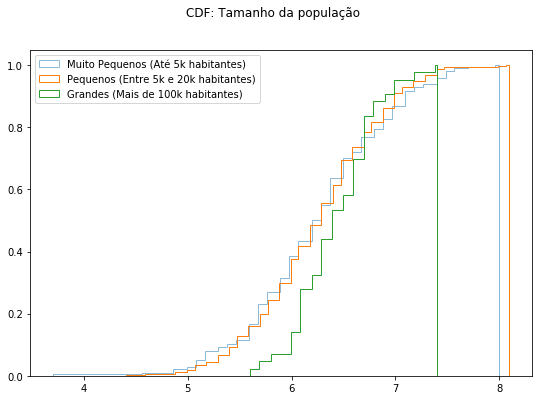

In [40]:
plt.rcParams['figure.figsize'] = (9,6)
plt.hist(dfMP['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', alpha=0.5, label='Muito Pequenos (Até 5k habitantes)')
plt.hist(dfP['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Pequenos (Entre 5k e 20k habitantes)')
plt.hist(dfG['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Grandes (Mais de 100k habitantes)')

plt.suptitle("CDF: Tamanho da população")
plt.legend(loc='upper left')
plt.show()

# Testes de Kolmogorov-Smirnov

* **Metodoloia:** Para aplicar este teste de duas amostras, constrói-se a distribuição das freqüências acumuladas relativas de cada uma das amostras, utilizando os mesmos intervalos para cada uma delas. Em cada intervalo subtraí-se uma função da outra. O teste utiliza como estatística o maior destas diferenças;
* Para a utilização do teste em amostras de tamanhos diferentes, elas precisam ser superiores a 40;
* **D = [Sn 1 (x) - Sn 2 (x)]** para uma prova bilateral.

## Quanto ao tamanho da população:

In [41]:
mp = dfMP['IDEB_NxP'].values
p = dfP['IDEB_NxP'].values
g = dfG['IDEB_NxP'].values

r1 = ks(mp, p)
r2 = ks(mp, g)
r3 = ks(p, g)

print('MP x P: ', r1)
print('MP x G: ', r2)
print('P x G: ', r3)

MP x P:  Ks_2sampResult(statistic=0.039323467230444, pvalue=0.9764680191647914)
MP x G:  Ks_2sampResult(statistic=0.24651162790697675, pvalue=0.020951102697180684)
P x G:  Ks_2sampResult(statistic=0.23546511627906977, pvalue=0.021416674951976983)


* Considerando **nível de significância a=0,05** e o comparando com pvalue;
* Se pvalue < a então muito provavelmente as distribuições são diferentes;
* Logo MP e P são considerados com distribuição iguais e os demais com diferentes.


# Estatísticas das 12 Mesorregiões
* Triângulo Mineiro / Alto Paranaíba
* Central Mineira
* Zona da Mata
* Oeste de Minas
* Vale do Rio Doce
* Sul / Sudoeste de Minas
* Campo das Vertentes
* Jequitinhonha
* Metropolitana de Belo Horizonte
* Noroeste de Minas
* Vale do Mucuri
* Norte de Minas


In [42]:
df[Notas[0]] = df[Notas[0]].astype(float)
df[Notas[1]] = df[Notas[1]].astype(float)
df[Notas[2]] = df[Notas[2]].astype(float)

In [43]:
mesoReg = ['Triângulo Mineiro / Alto Paranaíba', 'Central Mineira', 'Zona da Mata', 'Oeste de Minas', 'Vale do Rio Doce', 'Sul / Sudoeste de Minas', 'Campo das Vertentes', 'Jequitinhonha', 'Metropolitana de Belo Horizonte', 'Noroeste de Minas', 'Vale do Mucuri', 'Norte de Minas']
#mesoReg

In [44]:
dfMeso1 = df[df['MesoRegiao'] == 'Triângulo Mineiro / Alto Paranaíba']
dfMeso2 = df[df['MesoRegiao'] == 'Central Mineira']
dfMeso3 = df[df['MesoRegiao'] == 'Zona da Mata']
dfMeso4 = df[df['MesoRegiao'] == 'Oeste de Minas']
dfMeso5 = df[df['MesoRegiao'] == 'Vale do Rio Doce']
dfMeso6 = df[df['MesoRegiao'] == 'Sul / Sudoeste de Minas']
dfMeso7 = df[df['MesoRegiao'] == 'Campo das Vertentes']
dfMeso8 = df[df['MesoRegiao'] == 'Jequitinhonha']
dfMeso9 = df[df['MesoRegiao'] == 'Metropolitana de Belo Horizonte']
dfMeso10 = df[df['MesoRegiao'] == 'Noroeste de Minas']
dfMeso11 = df[df['MesoRegiao'] == 'Vale do Mucuri']
dfMeso12 = df[df['MesoRegiao'] == 'Norte de Minas']

In [45]:
meso = df.groupby('MesoRegiao')[["Mat", "Port", "IDEB_NxP"]]
meso_mean = meso.mean()
meso_mean

,Mat,Port,IDEB_NxP
MesoRegiao,,,
Campo das Vertentes,239.761944,226.391667,6.511111
Central Mineira,238.178276,227.278276,6.565517
Jequitinhonha,223.354510,213.430392,6.027451
Metropolitana de Belo Horizonte,233.695437,224.117670,6.333010
Noroeste de Minas,231.655789,220.976842,6.373684
Norte de Minas,218.334494,209.949888,5.906742
Oeste de Minas,245.313250,234.260250,6.837500
Sul / Sudoeste de Minas,243.703862,232.151931,6.655862
Triângulo Mineiro / Alto Paranaíba,232.440909,224.436970,6.315152


# CDF das Mesorregiões

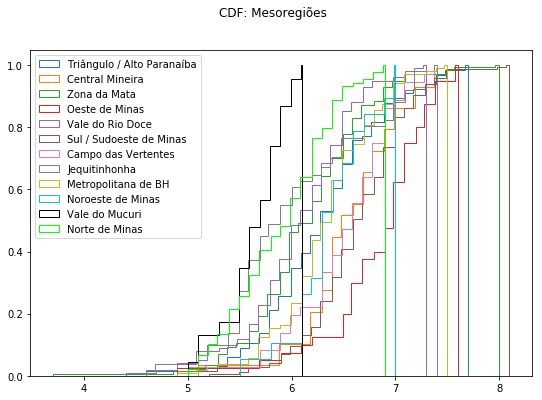

In [46]:
colors = ['yellowgreen', 'gold', 'purple', 'lightcoral', 'orange', 'gray', 'lightskyblue']
plt.rcParams['figure.figsize'] = (9,6)
plt.hist(dfMeso1['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Triângulo / Alto Paranaíba')
plt.hist(dfMeso2['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Central Mineira')
plt.hist(dfMeso3['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Zona da Mata')
plt.hist(dfMeso4['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Oeste de Minas')
plt.hist(dfMeso5['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Vale do Rio Doce')
plt.hist(dfMeso6['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Sul / Sudoeste de Minas')
plt.hist(dfMeso7['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Campo das Vertentes')
plt.hist(dfMeso8['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Jequitinhonha')
plt.hist(dfMeso9['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Metropolitana de BH')
plt.hist(dfMeso10['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Noroeste de Minas')
plt.hist(dfMeso11['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Vale do Mucuri', color=['black'])
plt.hist(dfMeso12['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Norte de Minas', color=['lime'])

plt.suptitle("CDF: Mesoregiões")
plt.legend(loc='upper left')
plt.show()

# Testes de Kolmogorov-Smirnov
## Quanto as Mesorregiões

In [47]:
# Testar para Vale do Mucuri com Metropolitana de BH; Vale do Mucuri com Sul; Sul com Norte
vm = dfMeso11['IDEB_NxP'].values # Vale do Mucuri
mbh = dfMeso9['IDEB_NxP'].values # Região Metropolitana de BH
s = dfMeso6['IDEB_NxP'].values # Sul / Sudoeste de Minas
n = dfMeso12['IDEB_NxP'].values # Norte de Minas

r4 = ks(vm, mbh)
r5 = ks(vm, s)
r6 = ks(s, n)

print('Mucuri x Metropolitana BH: ', r4)
print('Mucuri x  Sul/Sudoeste Minas: ', r5)
print('Sul/Sudoeste Minas x Norte Minas: ', r6)

Mucuri x Metropolitana BH:  Ks_2sampResult(statistic=0.7235120303925707, pvalue=1.4774749567173586e-09)
Mucuri x  Sul/Sudoeste Minas:  Ks_2sampResult(statistic=0.8689655172413793, pvalue=2.641350293559844e-14)
Sul/Sudoeste Minas x Norte Minas:  Ks_2sampResult(statistic=0.6054242541650523, pvalue=1.2581276450581352e-18)


* Considerando **nível de significância a=0,05** e o comparando com pvalue;
* Se pvalue < a então muito provavelmente as distribuições testadas são diferentes;
* Logo para as comparações feitas, são consideradas distribuições diferentes.

# Estatísticas - Redes de escola
Estadual, Municipal e Federal

In [48]:
dfComRedes[Notas[0]] = dfComRedes[Notas[0]].astype(float)
dfComRedes[Notas[1]] = dfComRedes[Notas[1]].astype(float)
dfComRedes[Notas[2]] = dfComRedes[Notas[2]].astype(float)

In [49]:
dfEstadual = dfComRedes[dfComRedes['Rede'] == 'Estadual'] #422
dfFederal = dfComRedes[dfComRedes['Rede'] == 'Federal'] #3
dfMunicipal = dfComRedes[dfComRedes['Rede'] == 'Municipal'] #760

redes = dfComRedes.groupby('Rede')[["Mat", "Port", "IDEB_NxP"]]
redes_mean = redes.mean()
redes_mean

,Mat,Port,IDEB_NxP
Rede,,,
Estadual,230.365498,221.213199,6.349763
Federal,262.250000,250.850000,7.300000
Municipal,231.349868,221.180500,6.234605


In [50]:
dfEstadual.loc[:,'IDEB_NxP'] = dfEstadual['IDEB_NxP'].astype(np.float)
dfFederal.loc[:,'IDEB_NxP'] = dfFederal['IDEB_NxP'].astype(np.float)
dfMunicipal.loc[:,'IDEB_NxP'] = dfMunicipal['IDEB_NxP'].astype(np.float)

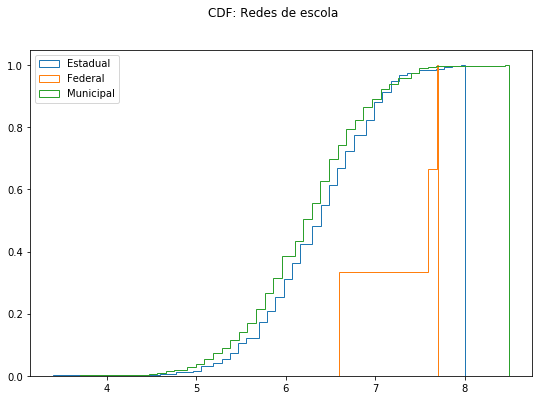

In [51]:
plt.rcParams['figure.figsize'] = (9,6)
plt.hist(dfEstadual['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Estadual')
plt.hist(dfFederal['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Federal')
plt.hist(dfMunicipal['IDEB_NxP'], bins=100, cumulative=True, density=True, histtype='step', label='Municipal')

plt.suptitle("CDF: Redes de escola")
plt.legend(loc='upper left')
plt.show()

# Testes de Kolmogorov-Smirnov
## Quanto as redes de escola

In [52]:
# Testar para Vale do Mucuri com Metropolitana de BH; Vale do Mucuri com Sul; Sul com Norte
est = dfEstadual['IDEB_NxP'].values # Vale do Mucuri
mun = dfMunicipal['IDEB_NxP'].values # Região Metropolitana de BH

r7 = ks(est, mun)

print('Estadual x Municipal: ', r7)

Estadual x Municipal:  Ks_2sampResult(statistic=0.08362434522324769, pvalue=0.042409292710769944)


* Considerando **nível de significância a=0,05** e o comparando com pvalue;
* Se pvalue < a então muito provavelmente as distribuições testadas são diferentes;
* Logo para as comparações feitas, são consideradas distribuições diferentes.

# Regressão Linear

In [53]:
# y = IDEB 
# Pontos serão os municípios
# Dimensões: Gasto por aluno

# https://matheusfacure.github.io/2017/07/19/MQO-sklearn/

x = np.array(df[['Custo Aluno', 'CodMeso']])
y = np.array(df['IDEB_NxP'])

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

modeloLinear = LinearRegression().fit(x_treino,y_treino)

print('y real: ', y_teste)
print('y previsto: ', modeloLinear.predict(x_teste))
print('Erro quadrado médio: ', mse(y_teste, modeloLinear.predict(x_teste)))

# O erro quadrático médio é definido como sendo a média da diferença entre o valor do estimador e do parâmetro ao quadrado. 
# Assim, para um estimador T, temos:
# MSE = EQM(T) = E(T - θ)² = Var(T) + [Viés(T)]²

y real:  [7.2 6.6 7.  6.6 6.3 6.6 6.2 6.4 7.  6.2 6.8 5.7 4.9 5.8 6.8 5.6 6.5 5.9
 5.2 5.3 5.8 6.2 6.3 5.9 5.1 7.  6.5 6.5 6.  6.4 7.3 5.9 6.1 6.4 6.2 6.4
 6.2 6.5 6.8 5.8 7.6 6.3 5.8 7.4 6.  7.3 7.  6.9 6.6 6.9 7.3 6.9 6.7 6.7
 6.  5.7 6.9 6.6 6.8 6.3 7.4 5.6 5.6 5.1 6.4 6.2 6.4 5.6 6.4 6.  7.  6.5
 6.2 5.5 7.1 6.7 7.4 6.1 6.8 5.3 6.3 5.6 6.3 5.6 5.8 6.4 6.7 7.4 7.4 6.
 6.4 6.  5.4 5.9 6.  5.3 6.7 6.9 5.5 5.5 6.5 7.1 7.1 6.5 6.7 5.8 6.3 5.6
 5.3 5.9 5.7 5.9 6.5 6.  5.8 6.5 7.  6.6 6.  6.2 7.2 6.7 5.6 5.9 6.5 5.3
 6.  6.6 7.  6.9 5.7 6.3 6.  6.7 6.1 6.  6.6 6.  6.2 6.  6.7 6.5 6.7 6.1
 7.3 6.  6.6 7.3 6.6 7.2 6.4 6.7 6.1 6.3 6.7 6.  5.5 6.  6.4 6.5 7.  6.1
 6.4 4.6 6.6 5.8 6.9 6.3 6.4 7.  7.  5.1 6.9 6.7 6.5 6.4 6.2 5.8 6.1 7.2
 7.  5.9 5.5 6.4 6.6 6.4 6.6 6.9 5.7 6.9 6.1 5.4 6.6 6.  5.7 6.1 7.1 7.
 5.2 5.7 6.  6.6 6.5 6.9 5.6 6.  6.5 6.3 6.7 5.6 5.8 5.8 7.3 5.5 6.8 6.4
 5.5 5.8 7.1 6.5 7.1 6.5 7.  7.2 6.3 7.  6.5 6.7 6.2 6.9 6.  5.7 5.1 7.2
 5.9 6.2 6.1 7.4 6.6 6.2 6.6 6.6 5.4 5.5 5.6

# Classificação utilizando KNN
1. Classificar municípios
2. ptMedioClasse: Ponto médio: média da (soma do valor máximo e o valor mínimo)
3. Classes: abaixo de ptMedioClasse ou acima/igual a ptMedioClasse
 * 0 = Abaixo do ponto médio
 * 1 = Acima do ponto médio
4. Atributos: mesorregião, custo por aluno, população.

In [77]:
maxIDEB = df['IDEB_NxP'].max()
minIDEB = df['IDEB_NxP'].min()
ptMedioClasse = (maxIDEB + minIDEB)/2

df['Classe'] = 0 
df['Classe'][df['IDEB_NxP'] >= ptMedioClasse] = 1
df.head()

/home/jessicatcr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,CodMun,CodMeso,MesoRegiao,NomeMun,UF,PopEst,Barco,Metro,Mototx,Taxi,...,TxAprv_5,IndRend_P,Mat,Port,NtMedPadr_N,IDEB_NxP,FUNDEB,Total Matriculados,Custo Aluno,Classe
1,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,Não,Não,Não,Sim,...,98.9,0.96,244.18,231.60,6.83,6.6,1879877.28,596.0,3154.16,1
4,3100203,3106,Central Mineira,Abaeté,MG,23611,Não,Não,Não,Sim,...,99.3,0.99,249.64,238.66,7.07,7.0,5926149.70,1814.0,3266.90,1
7,3100302,3112,Zona da Mata,Abre Campo,MG,13733,Não,Não,Não,Não,...,99.5,0.98,246.48,236.46,6.97,6.8,2726339.20,809.0,3370.01,1
9,3100401,3112,Zona da Mata,Acaiaca,MG,4065,Não,Não,Não,Sim,...,100.0,1.00,231.57,222.84,6.43,6.4,1607122.54,520.0,3090.62,1
12,3100807,3109,Oeste de Minas,Aguanil,MG,4440,Não,Não,Não,Sim,...,100.0,1.00,267.36,247.50,7.57,7.6,1844691.36,550.0,3353.98,1


In [82]:
#x = np.array(df[['CodMeso', 'Custo Aluno']])
x = np.array(df[['CodMeso', 'PopEst', 'Custo Aluno']])
y = np.array(df['Classe'])

#x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)
#x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

modeloKNN = KNeighborsClassifier(n_neighbors=1).fit(x_treino, y_treino)
modeloKNN.predict(x_teste)

print('y real: ', y_teste)
print('y previsto: ', modeloKNN.predict(x_teste))
print(classification_report(y_teste, modeloKNN.predict(x_teste)))

y real:  [0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1]
y previsto:  [1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1

# Conclusão

Responda sua pergunta (questão inicial) pelo menos de forma evidencial.
Explicar resultados classificador e regressão aqui ou nas linhas de cima.